<a href="https://colab.research.google.com/github/Vidyadhar4240/SentimentalAnaysis/blob/master/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving emails.csv to emails.csv
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)
                                                text  spam
0  subject naturally irresistible your corporate ...     1
1  subject the stock trading gunslinger fanny is ...     1
2  subject unbelievable new homes made easy im wa...     1


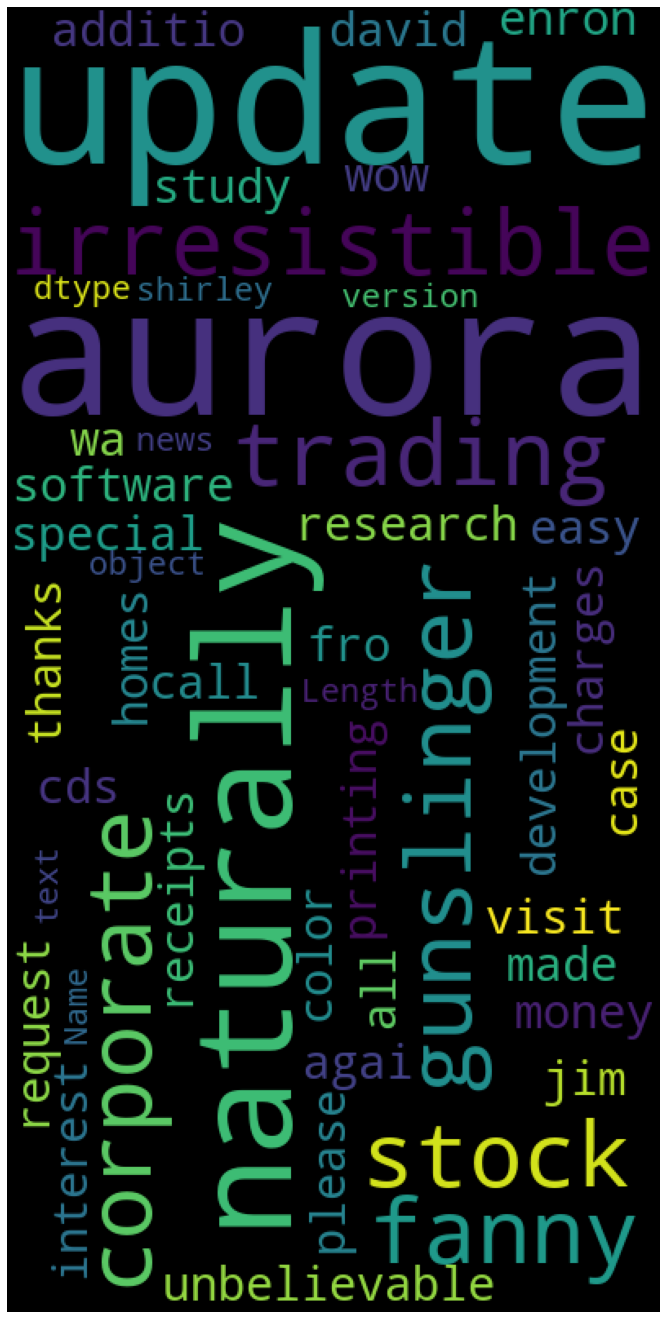

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1926
           1       0.99      0.90      0.95       637

    accuracy                           0.97      2563
   macro avg       0.98      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



In [ ]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
#create dataframe from csv
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('emails.csv')
print(df.head())
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]
print(df.shape)

clean_desc = []
for w in range(len(df.text)):
  desc = df['text'][w].lower()

  #remove punctuation 
  desc = re.sub('[^a-zA-Z]', ' ', desc)

  #remove numbers and special characters
  desc = re.sub("(\\d|\\W)+"," ",desc)

  clean_desc.append(desc)

#assign the cleaned descriptions to dataframe
df['text'] = clean_desc
print(df.head(3))

stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject',#1
'100% more',
'100% free',
'100% satisfied',
'Additional income',
'Be your own boss',
'Best price',
'Big bucks',
'Billion',
'Cash bonus',
'Cents on the ',
'dollar',
'Consolidate debt',
'Double your cash',
'Double your income',
'Earn extra cash',
'Earn money',
'Eliminate bad credit',
'Extra cash']

#Creating our own word cloud using the WordCloud library
wordcloud = WordCloud(width=400,height=800,background_color='black',stopwords=stop_words,max_words=1000,min_font_size=20).generate(str(df['text']))

#plot the word cloud
fig = plt.figure(figsize=(16,24), facecolor=None, edgecolor='red')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, accuracy_score

#Now using the Bag of words method
text_vec = CountVectorizer().fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size=0.45, random_state=42, shuffle=True)

#Classification of the dataset by using the model GradientBoostingClassifier()
classifier = ensemble.GradientBoostingClassifier(n_estimators=100, #how may decision trees to build
                                                 learning_rate=0.5,#learning rate
                                                 max_depth=6)

#Training the dataset and generating the predictions
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))




In [ ]:
#Sentimental analysis using NLP, textBlob
from textblob import TextBlob
blob = TextBlob("This is a nice and best example of textblob")
#print(blob.sentiment)
#Applying text blob to the dataframe
#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]

#add the sentiment metrics to the dataframe
df['tb_pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_subj'] = [b.sentiment.subjectivity for b in email_blob]

print(df.head(10))



                                                text  spam    tb_pol   tb_subj
0  subject naturally irresistible your corporate ...     1  0.296607  0.546905
1  subject the stock trading gunslinger fanny is ...     1  0.160317  0.562698
2  subject unbelievable new homes made easy im wa...     1  0.040229  0.480581
3  subject color printing special request additio...     1  0.163492  0.468254
4  subject do not have money get software cds fro...     1  0.433333  0.395833
5  subject great nnews hello welcome to medzonlin...     1  0.361905  0.690476
6  subject here s a hot play in motion homeland s...     1  0.100542  0.469126
7  subject save your money buy getting this thing...     1  0.263810  0.483810
8  subject undeliverable home based business for ...     1 -0.011667  0.423333
9  subject save your money buy getting this thing...     1  0.263810  0.483810


In [ ]:
#Installint the dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as tfhub
import sqlite3
from sqlite3 import  Error
import io

from google.colab import files
uploaded = files.upload()

#create connection to the sqlite database
conn = sqlite3.connect('db\wine_data.sqlite', detect_types=sqlite3.PARSE_DECLTYPES)
c = conn.cursor()

#Read the data from the table of wine data
wine_df = pd.read_sql('Select * from wine_data', conn)

#Drop duplicates
wine_df = wine_df.drop_duplicates('description')

#Dropping the null prices
wine_df = wine_df.dropna(supset=['price'])

#Now filtering the dataset to show the wines which are above 200 reviews
wine_df = wine_df.groupby('variety').filter(lambda x: len(x) > 200)

#Now updating the color of wine by adding the color of wine manually
wine_df['color'] = ''

#used to update the wine color rather than doing it manually
c.execute("update wine_data set color = 'red' where the variery = 'Aglianico' ")

#Now commit the update to database and save it
con.commit()

#Now removing all the records which do not have any color for cleansing the data
wine_df = pd.read_sql("select country, description,rating,price,province,title,variety, winery, color  from wine_data where color in ('red', 'white', 'other')", conn)
wine_df.to_sql('wine_data', conn, if_exists = "replace")




Saving wine_data.csv to wine_data (1).csv


This is a project on analysing the quality of wine using nlp